<a href="https://colab.research.google.com/github/lynilla/BangkitPlantPathology/blob/master/Copy_of_Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [7]:
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# **Download Dataset**

In [2]:
os.environ['KAGGLE_USERNAME']="xxxxx"
os.environ['KAGGLE_KEY']="xxxxxxxxxxxxxxxxxxxx"

In [3]:
!kaggle datasets download noulam/tomato

 98% 729M/743M [00:23<00:00, 27.1MB/s]
100% 743M/743M [00:23<00:00, 33.7MB/s]


In [4]:
!unzip tomato.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ad6857d9-7cf0-42ec-b61b-7b5208863831___RS_HL 0320.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___h

# Displaying Some Training Images

In [5]:
#create directory for each training category
healthy_dir = os.path.join('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy')
tomato_bs_dir = os.path.join('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot')
tomato_eb_dir = os.path.join('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight')
tomato_lb_dir = os.path.join('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight')
tomato_lm_dir = os.path.join('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold')
tomato_sls_dir = os.path.join('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot')
tomato_tssm_dir = os.path.join('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite')
tomato_ts_dir = os.path.join('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot')
tomato_ylcv_dir = os.path.join('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus')
tomato_mv_dir = os.path.join('/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus')

#show the number of images in each training category
print('total training Healthy:', len(os.listdir(healthy_dir)))
print('total training Bacterial Spot images:', len(os.listdir(tomato_bs_dir)))
print('total training Early Blight images:', len(os.listdir(tomato_eb_dir)))
print('total training Late Blight images:', len(os.listdir(tomato_lb_dir)))
print('total training Leaf Mold images:', len(os.listdir(tomato_lm_dir)))
print('total training Septoria Leaf Spot images:', len(os.listdir(tomato_sls_dir)))
print('total training Two-spotted Spider Mite images:', len(os.listdir(tomato_tssm_dir)))
print('total training Target Spot images:', len(os.listdir(tomato_ts_dir)))
print('total training Tomato Yellow Leaf Curl Virus images:', len(os.listdir(tomato_ylcv_dir)))
print('total training Tomato Mosaic Virus images:', len(os.listdir(tomato_mv_dir)))

healthy_files=os.listdir(healthy_dir)
tomato_bs_files=os.listdir(tomato_bs_dir)
tomato_eb_files=os.listdir(tomato_eb_dir)
tomato_lb_files=os.listdir(tomato_lb_dir)
tomato_lm_files=os.listdir(tomato_lm_dir)
tomato_sls_files=os.listdir(tomato_sls_dir)
tomato_tssm_files=os.listdir(tomato_tssm_dir)
tomato_ts_files=os.listdir(tomato_ts_dir)
tomato_ylcv_files=os.listdir(tomato_ylcv_dir)
tomato_mv_files=os.listdir(tomato_mv_dir)

total training Healthy: 1926
total training Bacterial Spot images: 1702
total training Early Blight images: 1920
total training Late Blight images: 1851
total training Leaf Mold images: 1882
total training Septoria Leaf Spot images: 1745
total training Two-spotted Spider Mite images: 1741
total training Target Spot images: 1827
total training Tomato Yellow Leaf Curl Virus images: 1961
total training Tomato Mosaic Virus images: 1790


In [6]:
%matplotlib inline

rows=10
cols=3
pic_index=3

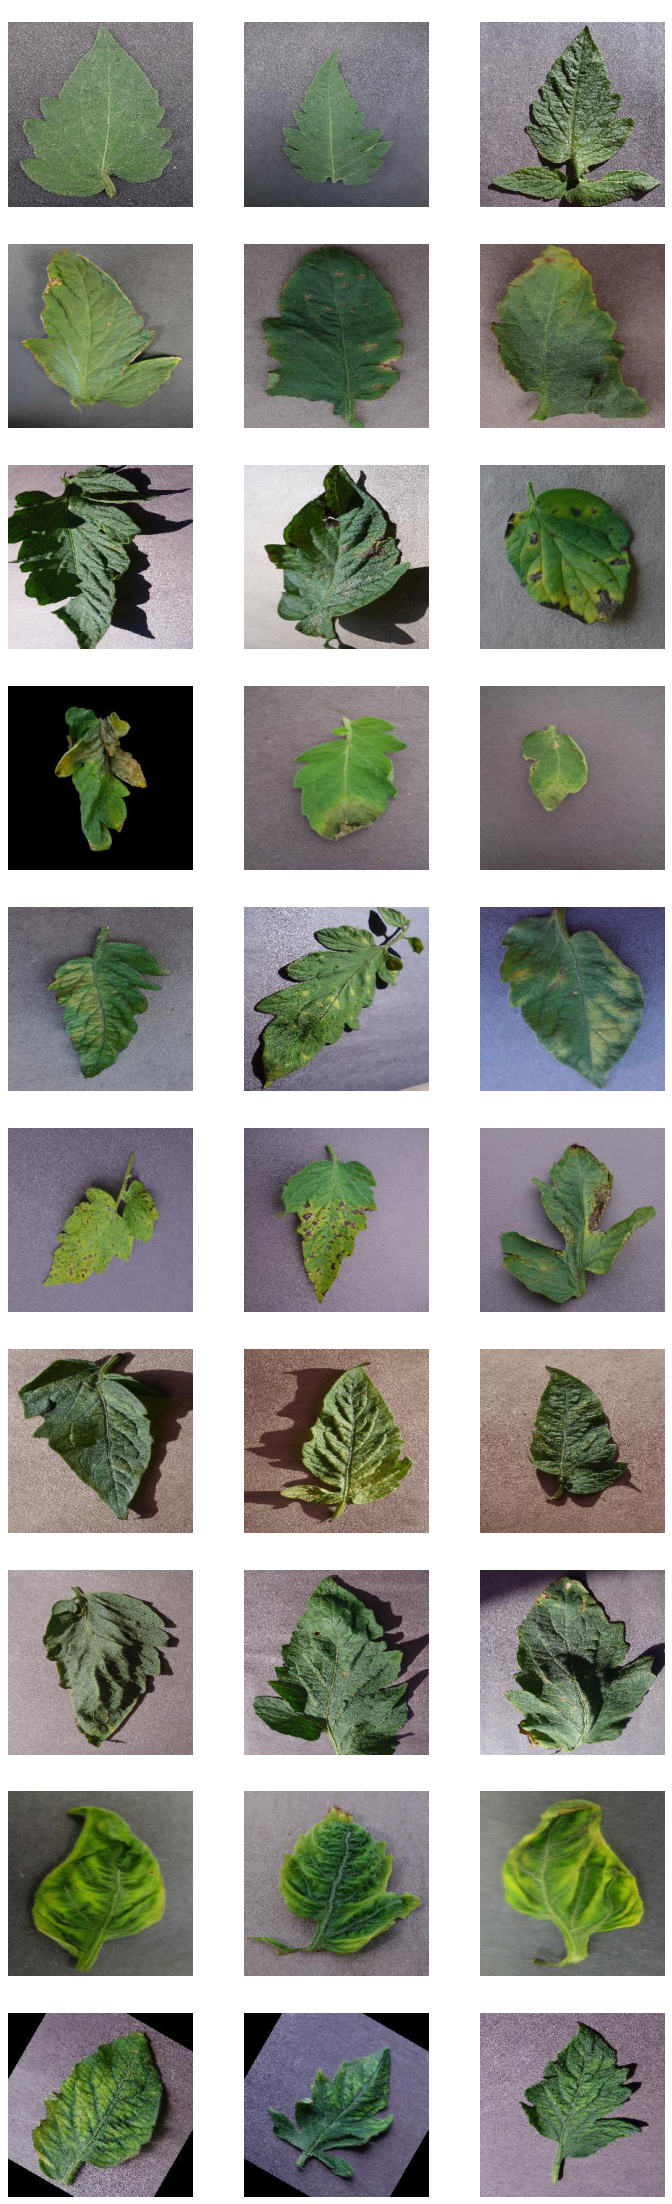

In [8]:
fig = plt.gcf()
fig.set_size_inches(cols*4, rows*4)

title_list=[]
healthy_pic, tomato_bs_pic, tomato_eb_pic, tomato_lb_pic, tomato_lm_pic, tomato_sls_pic, tomato_tssm_pic, = [], [], [], [], [], [], []
tomato_ts_pic, tomato_ylcv_pic, tomato_mv_pic= [], [], []


for ex in healthy_files[ pic_index-3:pic_index]:
  healthy_pic.append(os.path.join(healthy_dir, ex))
  title_list.append(healthy_dir.split('___')[-1])

for ex in tomato_bs_files[ pic_index-3:pic_index]:
  tomato_bs_pic.append(os.path.join(tomato_bs_dir, ex))
  title_list.append(tomato_bs_dir.split('___')[-1])

for ex in tomato_eb_files[ pic_index-3:pic_index]:
  tomato_eb_pic.append(os.path.join(tomato_eb_dir, ex))
  title_list.append(tomato_eb_dir.split('___')[-1])

for ex in tomato_lb_files[ pic_index-3:pic_index]:
  tomato_lb_pic.append(os.path.join(tomato_lb_dir, ex))
  title_list.append(tomato_lb_dir.split('___')[-1])

for ex in tomato_lm_files[ pic_index-3:pic_index]:
  tomato_lm_pic.append(os.path.join(tomato_lm_dir, ex))
  title_list.append(tomato_lm_dir.split('___')[-1])

for ex in tomato_sls_files[ pic_index-3:pic_index]:
  tomato_sls_pic.append(os.path.join(tomato_sls_dir, ex))
  title_list.append(tomato_sls_dir.split('___')[-1])

for ex in tomato_tssm_files[ pic_index-3:pic_index]:
  tomato_tssm_pic.append(os.path.join(tomato_tssm_dir, ex))
  title_list.append(tomato_tssm_dir.split('mites ')[-1])

for ex in tomato_ts_files[ pic_index-3:pic_index]:
  tomato_ts_pic.append(os.path.join(tomato_ts_dir, ex))
  title_list.append(tomato_ts_dir.split('___')[-1])

for ex in tomato_ylcv_files[ pic_index-3:pic_index]:
  tomato_ylcv_pic.append(os.path.join(tomato_ylcv_dir, ex))
  title_list.append(tomato_ylcv_dir.split('___')[-1])

for ex in tomato_mv_files[ pic_index-3:pic_index]:
  tomato_mv_pic.append(os.path.join(tomato_mv_dir, ex))
  title_list.append(tomato_mv_dir.split('___')[-1])

for i, img_path in enumerate(healthy_pic+tomato_bs_pic+tomato_eb_pic+tomato_lb_pic+tomato_lm_pic+tomato_sls_pic+tomato_tssm_pic+tomato_ts_pic+tomato_ylcv_pic+tomato_mv_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(10, cols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  img_title=plt.title(title_list[i])
  plt.setp(img_title, color='w')  
plt.show()

# **Image Preprocessing**

In [ ]:
TRAINING_DIR = '/content/New Plant Diseases Dataset(Augmented)/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = '/content/New Plant Diseases Dataset(Augmented)/valid/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


# **Define Machine Learning Model**

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

# **Define Learning Parameter**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# **Begin Training**

In [ ]:
history = model.fit(train_generator, epochs=40, validation_data=validation_generator)

Epoch 1/40
144/144 [==============================] - 291s 2s/step - loss: 3.0431 - accuracy: 0.3193 - val_loss: 1.4766 - val_accuracy: 0.4772
Epoch 2/40
144/144 [==============================] - 294s 2s/step - loss: 1.4869 - accuracy: 0.4982 - val_loss: 1.0813 - val_accuracy: 0.6336
Epoch 3/40
144/144 [==============================] - 297s 2s/step - loss: 1.1416 - accuracy: 0.6179 - val_loss: 0.9123 - val_accuracy: 0.6875
Epoch 4/40
144/144 [==============================] - 297s 2s/step - loss: 0.8855 - accuracy: 0.6969 - val_loss: 1.0272 - val_accuracy: 0.6796
Epoch 5/40
144/144 [==============================] - 300s 2s/step - loss: 0.7879 - accuracy: 0.7412 - val_loss: 0.6349 - val_accuracy: 0.7749
Epoch 6/40
144/144 [==============================] - 301s 2s/step - loss: 0.6700 - accuracy: 0.7827 - val_loss: 0.6283 - val_accuracy: 0.7996
Epoch 7/40
144/144 [==============================] - 300s 2s/step - loss: 0.6069 - accuracy: 0.8061 - val_loss: 0.4400 - val_accuracy: 0.8628

# **Plot Training Results**

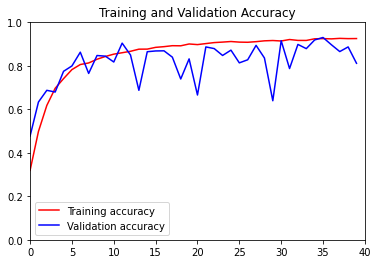

<Figure size 432x288 with 0 Axes>

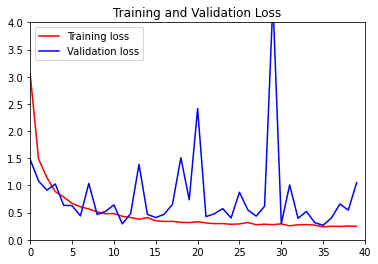

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.ylim(0, 1)
plt.xlim(0, 40)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.ylim(0, 4)
plt.xlim(0, 40)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Save Model**

In [ ]:
export_path = "/content/saved_model"

try: 
  os.mkdir(export_path) 
except OSError as error: 
  print(error) 

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/saved_model/assets

Saved model:
total 140
drwxr-xr-x 2 root root   4096 May 29 04:51 assets
-rw-r--r-- 1 root root 133086 May 29 04:51 saved_model.pb
drwxr-xr-x 2 root root   4096 May 29 04:51 variables


# **Download Saved Model**

In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/assets/ (stored 0%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.index (deflated 64%)
  adding: content/saved_model/variables/variables.data-00001-of-00002 (deflated 18%)
  adding: content/saved_model/variables/variables.data-00000-of-00002 (deflated 77%)
  adding: content/saved_model/saved_model.pb (deflated 88%)


In [ ]:
files.download("/content/saved_model.zip")

# **Upload Saved Model**

In [ ]:
uploaded = files.upload()
!unzip /content/saved_model.zip
model = tf.keras.models.load_model('/content/saved_model/')
model.summary()

# **Try Classification**

In [ ]:
from google.colab import files

file = files.upload()

img = image.load_img(list(file.keys())[0], target_size=(256, 256))
img = image.img_to_array(img)
img = img.reshape(1, 256, 256, 3)
img = img.astype('float32')
img = img / 255.0
result = model.predict(img)
result = list(result[0]).index(max(result[0]))

print("\n\nResult :")

if result == 0:
  print("Bacterial Spot")
elif result == 1:
  print("Early Blight")
elif result == 2:
  print("Late Blight")
elif result == 3:
  print("Leaf Mold")
elif result == 4:
  print("Septoria Leaf Spot")
elif result == 5:
  print("Spider Mites")
elif result == 6:
  print("Target Spot")
elif result == 7:
  print("Yellow Leaf Curl Virus")
elif result == 8:
  print("Mosaic Virus")
else:
  print("Healthy")

Saving datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___Tomato_mosaic_virus_02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG 2098_180deg.jpg to datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___Tomato_mosaic_virus_02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG 2098_180deg.jpg


Result :
Mosaic Virus
